# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [25]:
# Import the appropriate libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
# Create two new dataframes
north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')

In [26]:
#testing to see if north branch info imported correctly
north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [27]:
#testing to see if south branch info imported correctly
south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?


In [28]:
# Put your EDA code here
#amount of Reps in north branch
north_df_reps = north_df.value_counts('Rep ID').count()
north_df_reps

9

In [29]:
#amount of Reps in south branch
south_df_reps = south_df.value_counts('Rep ID').count()
south_df_reps

11

In [30]:
#avg for collumns in north branch
north_df.mean()

C:\Users\timle\AppData\Local\Temp/ipykernel_6420/2257656193.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  north_df.mean()


Unnamed: 0               122.000000
Lost Call                  0.020408
Abandoned                  0.028571
Busy Minutes               9.987755
Not Ready Minutes          1.914286
Incoming Wait Time         3.048780
During Call Wait Time      2.967347
Calls                      1.000000
dtype: float64

In [31]:
#avg for collumns in south branch
south_df.mean()

C:\Users\timle\AppData\Local\Temp/ipykernel_6420/2808436413.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  south_df.mean()


Unnamed: 0               156.500000
Lost Call                  0.035032
Abandoned                  0.012739
Busy Minutes              10.054140
Not Ready Minutes          1.910828
Incoming Wait Time         3.000000
During Call Wait Time      3.076433
Calls                      1.000000
dtype: float64

In [68]:
#ordering table by Time Block to see number of calls taken per each time block in north branch
north_df_tb = north_df.value_counts('Time Block')
north_df_tb

Time Block
12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5
dtype: int64

In [67]:
#ordering table by Time Block to see number of calls taken per each time block in south branch
south_df_tb = south_df.value_counts('Time Block')
south_df_tb

Time Block
12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5
dtype: int64

### EDA Results

Make note of your results here!

1. How many reps are in each branch?

North - 9

South - 11



2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?

#### North:

avg busy minutes - 9.987755

avg not ready minutes - 1.914286

avg incoming wait time - 3.048780

avg during call wait time - 2.967347

#### South:

avg busy minutes - 10.054140

avg not ready minutes - 1.910828

avg incoming wait time - 3.000000

avg during call wait time - 3.076433



3. What is the number of calls taken for each time block?

#### North:

12pm - 45 calls

10am - 43 calls

2pm - 35 calls

3pm - 30 calls

4pm - 28 calls

11am - 25 calls

1pm - 17 calls

5pm - 17 calls

9am - 5 calls

#### South:

12pm - 75 calls

10am - 56 calls

3pm - 43 calls

11am - 31 calls

2pm - 30 calls

5pm - 26 calls

4pm - 25 calls

1pm - 23 calls

9am - 5 calls

## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [63]:
# Clean your data here
#showing all rows for data
pd.set_option('display.max_rows', None)
#north branch data
north_df.replace(to_replace ="YES ", value ="YES")

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls,percent
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1,14.285714
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1,0.000000
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1,0.000000
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1,0.000000
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1,0.000000
5,5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1,0.000000
6,6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,3,1,0.000000
7,7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1,0.000000
8,8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,4,1,0.000000
9,9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,4,1,0.000000


In [35]:
#south branch data
south_df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
5,5,South,Sales Support,1:00 PM,Incoming,D,Karl,NO,0,0,9,1,1.0,4,1
6,6,South,Product Support,11:00 AM,Incoming,C,Sandy,NO,0,0,8,1,1.0,2,1
7,7,South,Product Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,1,1.0,3,1
8,8,South,Product Support,2:00 PM,Incoming,D,Randy,NO,0,0,11,2,1.0,4,1
9,9,South,Product Support,3:00 PM,Incoming,D,George,NO,0,0,8,3,1.0,4,1


In [36]:
#looking for duplicate rows in north branch
dup_rows_north_df = north_df[north_df.duplicated()]
print("Number of duplicated north_df rows: ", dup_rows_north_df.shape)

Number of duplicated north_df rows:  (0, 15)


In [37]:
#looking for duplicate rows in south branch
dup_rows_south_df = south_df[south_df.duplicated()]
print("Number of duplicated south_df rows: ", dup_rows_north_df.shape)

Number of duplicated south_df rows:  (0, 15)


### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?

Yes, all incoming wait time null values correspond to outgoing calls



2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

Some of the "YES" values have a space after the word like so: "YES ", so to rectify this, I made them all uniform.


3. Are there duplicates in the two data sets? If there are, how did you handle them?

No, there are no duplicates.


4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

No

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [38]:
# Manipulate data here
#company data combining north and south branches
df = north_df.append([south_df])
df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
5,5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1
6,6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,3,1
7,7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1
8,8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,4,1
9,9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,4,1


In [39]:
#Group by Rep ID and sum the resulting structure.  
#Sort by calls to determine which rep in each branch has the highest number of calls
df.groupby("Rep ID").sum().sort_values(by=['Calls'])

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,,
Alice,3637,0,0,199,46,15.0,58,20
Amanda,2666,0,1,229,43,12.0,60,23
Andy,2494,0,3,228,43,36.0,65,23
Cam,2746,1,0,233,46,32.0,66,24
Xander,3340,1,0,244,44,20.0,68,24
Sharon,4226,1,1,257,38,29.0,77,25
Josh,3960,3,0,260,50,31.0,83,26
Susan,4006,2,0,267,53,35.0,88,26
Joe,3178,0,0,256,49,36.0,81,26


In [64]:
#mean of north branch abandoned calls
n_avg_call_abandon = (north_df["Abandoned"].sum()/north_df["Calls"].sum())*100
n_avg_call_abandon

2.857142857142857

In [65]:
#mean of south branch abandoned calls
s_avg_call_abandon = (south_df["Abandoned"].sum()/south_df["Calls"].sum())*100
s_avg_call_abandon

1.2738853503184715

In [66]:
#mean of company abandoned calls
comp_avg_call_abandon = (df["Abandoned"].sum()/df["Calls"].sum())*100
comp_avg_call_abandon

1.9677996422182469

In [43]:
# percent of north branch abandoned calls
north_df['percent'] = (north_df['Abandoned'] / north_df['Abandoned'].sum()) * 100
north_df['percent'].mean()

0.40816326530612235

In [44]:
# percent of south branch abandoned calls
south_df['percent'] = (south_df['Abandoned'] / south_df['Abandoned'].sum()) * 100
south_df['percent'].mean()

0.3184713375796178

In [45]:
# percent of company abandoned calls
df['percent'] = (df['Abandoned'] / df['Abandoned'].sum()) * 100
df['percent'].mean()

0.1788908765652952

In [46]:
#percentage of calls answered  within 2 seconds for north branch
#incoming wait time
north_seconds = (north_df["Incoming Wait Time"] <= 2.0).sum()
north_percentage = (north_seconds/north_df["Calls"].sum()*100).round(2)
north_percentage
# __(<=2.0)__/82 = * 100           there are 82 non-null values in 'incoming wait time'

13.47

In [47]:
#percentage of calls answered  within 2 seconds for south branch
#incoming wait time
south_seconds = (south_df["Incoming Wait Time"] <= 2.0).sum()
south_percentage = (south_seconds/south_df["Calls"].sum()*100).round(2)
south_percentage

15.29

In [48]:
#percentage of calls answered  within 2 seconds for whole company
#incoming wait time
company_seconds = (df["Incoming Wait Time"] <= 2.0).sum()
company_percentage = (company_seconds/df["Calls"].sum()*100).round(2)
company_percentage

14.49

In [49]:
#avg speed of answer north branch
#incoming wait time
north_df.mean()

C:\Users\timle\AppData\Local\Temp/ipykernel_6420/3457838157.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  north_df.mean()


Unnamed: 0               122.000000
Lost Call                  0.020408
Abandoned                  0.028571
Busy Minutes               9.987755
Not Ready Minutes          1.914286
Incoming Wait Time         3.048780
During Call Wait Time      2.967347
Calls                      1.000000
percent                    0.408163
dtype: float64

In [50]:
#avg speed of answer south branch
south_df.mean()

C:\Users\timle\AppData\Local\Temp/ipykernel_6420/3000737887.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  south_df.mean()


Unnamed: 0               156.500000
Lost Call                  0.035032
Abandoned                  0.012739
Busy Minutes              10.054140
Not Ready Minutes          1.910828
Incoming Wait Time         3.000000
During Call Wait Time      3.076433
Calls                      1.000000
percent                    0.318471
dtype: float64

In [51]:
#avg speed of answer whole company
df.mean()

C:\Users\timle\AppData\Local\Temp/ipykernel_6420/2822675818.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Unnamed: 0               141.379249
Lost Call                  0.028623
Abandoned                  0.019678
Busy Minutes              10.025045
Not Ready Minutes          1.912343
Incoming Wait Time         3.019231
During Call Wait Time      3.028623
Calls                      1.000000
percent                    0.178891
dtype: float64

### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

#### North
Brent with 37 calls

#### South
Eric with 35 calls


2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

#### North
2.857142857142857%

#### South
1.2738853503184715%

#### Whole Company
1.9677996422182469%

Yes, the South and Company as a whole fall outside of the 2-5%


3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?

#### North
13.47

#### South
15.29

#### Whole Company
14.49

4. For each branch and the entire company, what is the average speed of answer?

#### North
3.048780

#### South
3.000000

#### Whole Company
3.019231


## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

In [52]:
df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls,percent
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1,9.090909
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1,0.000000
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1,0.000000
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1,0.000000
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1,0.000000
5,5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1,0.000000
6,6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,3,1,0.000000
7,7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1,0.000000
8,8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,4,1,0.000000
9,9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,4,1,0.000000


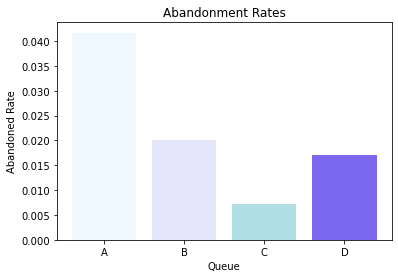

In [53]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#What is the average abandonment rate per queue?  
#comparison - bar chart

#creating bar chart
plt.bar(abandonment_rates.keys(), abandonment_rates.values(), color = ['#F0F8FF', '#E6E6FA', '#B0E0E6', '#7B68EE'])
#adding aesthetics
plt.title('Abandonment Rates')
plt.xlabel('Queue')
plt.ylabel('Abandoned Rate')
#show plot
plt.show()

In [54]:
abandonment_rates

{'A': 0.041666666666666664,
 'B': 0.020134228187919462,
 'C': 0.007246376811594203,
 'D': 0.017045454545454544}

In [55]:
queue_dict

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls,percent
Queue,,,,,,,,,
A,11084,1,4,946,181,116.0,272,96,36.363636
B,18806,4,3,1501,288,134.0,455,149,27.272727
C,21602,4,1,1409,251,160.0,435,138,9.090909
D,27539,7,3,1748,349,218.0,531,176,27.272727


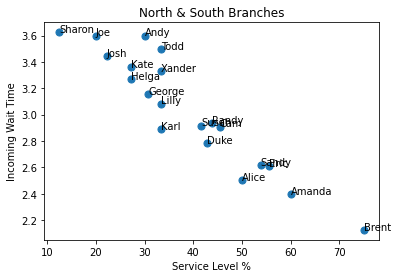

In [56]:
# Create visualization 2 here
# # north_plt contains the data you need for the average speed of answer of each rep

comp_plt = df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = df[df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = df[df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#What is the service level and average speed of answer per each rep?
#scatter plot

l_merge = pd.merge(comp_plt, service_level, on="Rep ID", how="left")

#creating scatter plot
plt.scatter(l_merge['Service Level %'], l_merge['Incoming Wait Time'], s=50)
#adding aesthetics
plt.title('North & South Branches')
plt.xlabel('Service Level %')
plt.ylabel('Incoming Wait Time')

names = list(l_merge['Rep ID'])
for num, name in enumerate(names):
   plt.annotate(name, (l_merge["Service Level %"][num], l_merge["Incoming Wait Time"][num])) 

#show plot
plt.show()

In [57]:
comp_plt

,Rep ID,Incoming Wait Time
0,Alice,2.500000
1,Amanda,2.400000
2,Andy,3.600000
3,Brent,2.125000
4,Cam,2.909091
5,Duke,2.785714
6,Eric,2.611111
7,George,3.153846
8,Helga,3.272727
9,Joe,3.600000


In [58]:
quick_stats

,Calls
Rep ID,
Alice,3
Amanda,3
Andy,3
Brent,6
Cam,5
Duke,6
Eric,10
George,4
Helga,3


In [59]:
total_stats

,Calls
Rep ID,
Alice,6
Amanda,5
Andy,10
Brent,8
Cam,11
Duke,14
Eric,18
George,13
Helga,11


In [60]:
#added 'Incoming Wait Time'
service_level

,Calls_x,Calls_y,Service Level %
Rep ID,,,
Alice,3,6,50.000000
Amanda,3,5,60.000000
Andy,3,10,30.000000
Brent,6,8,75.000000
Cam,5,11,45.454545
Duke,6,14,42.857143
Eric,10,18,55.555556
George,4,13,30.769231
Helga,3,11,27.272727


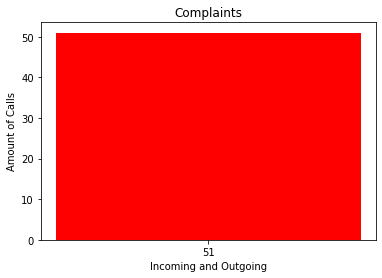

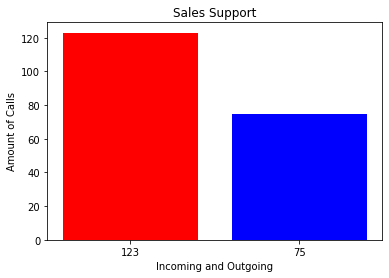

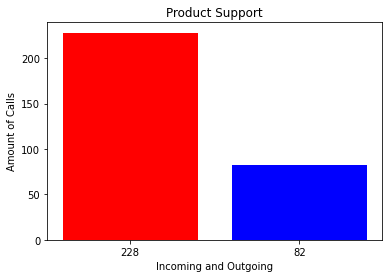

In [61]:
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()


#For each type of call purpose, how many calls are outgoing vs. incoming?
#bar chart

#creating bar chart
plt.bar(range(len(complaints)),list(complaints.values()),align="center",color = ["red", "blue"])
plt.xticks(range(len(complaints)),list(complaints.values()))
plt.title('Complaints')
plt.xlabel('Incoming and Outgoing')
plt.ylabel('Amount of Calls')
plt.show()

plt.bar(range(len(sales_support)),list(sales_support.values()),align="center",color = ["red", "blue"])
plt.xticks(range(len(sales_support)),list(sales_support.values()))
plt.title('Sales Support')
plt.xlabel('Incoming and Outgoing')
plt.ylabel('Amount of Calls')
plt.show()

plt.bar(range(len(product_support)),list(product_support.values()),align="center",color = ["red", "blue"])
plt.xticks(range(len(product_support)),list(product_support.values()))
plt.title('Product Support')
plt.xlabel('Incoming and Outgoing')
plt.ylabel('Amount of Calls')
plt.show()

### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

1. Column chart to compare a single category between indiviual items
2. Scatter plot to identify relationships between two variables. It can be effectively used in circumstances where the dependent variable can have multiple values for the independent variable.
3. Column chart to compare a single category between indiviual items

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why? 

The South branch is operating more efficiently in my opinion because the abandoned calls are fewer, the service level % is higher, and the speed of answer is faster.

2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

I would say that the North branch would benefit more from the extra help due to over 50% of them having a high incoming wait time and the branch overall having a higher abandonment rate

3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

Possibly years experience to help gauge if there's a relationship between the experience level and incoming wait time, service level %, and abandonment rate.

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [ ]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:
